In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

### **Loading the data**

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0].shape

(28, 28)

### **Image Display Using Pixel**

In [8]:
import matplotlib.pyplot as plt

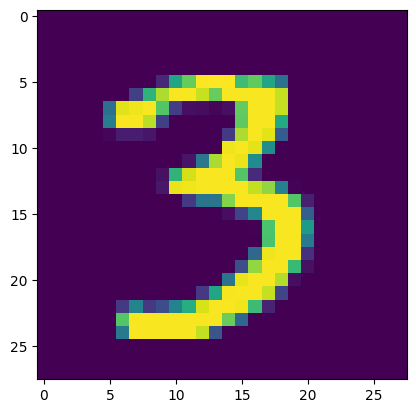

In [11]:
plt.imshow(X_train[10000])

### **Standardization**

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [15]:
X_train = X_train / 255
X_test = X_test / 255

### **Model Building**

In [19]:
model = Sequential()

In [20]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
model_metrics = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9168 - loss: 0.2926 - val_accuracy: 0.9485 - val_loss: 0.1721
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9603 - loss: 0.1342 - val_accuracy: 0.9655 - val_loss: 0.1188
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9731 - loss: 0.0901 - val_accuracy: 0.9697 - val_loss: 0.1014
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9800 - loss: 0.0667 - val_accuracy: 0.9712 - val_loss: 0.0944
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9846 - loss: 0.0520 - val_accuracy: 0.9730 - val_loss: 0.0950
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9878 - loss: 0.0403 - val_accuracy: 0.9757 - val_loss: 0.0850
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9744 - val_loss: 0.0882
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9930 - loss: 0.0243 -

In [28]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


In [29]:
y_pred = y_pred.argmax(axis=1)

In [30]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

### **Model Evaluation**

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.9778

### **Plot Metrics**

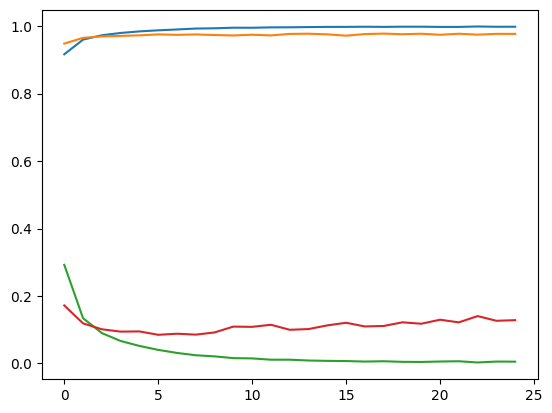

In [33]:
plt.plot(model_metrics.history['accuracy'])
plt.plot(model_metrics.history['val_accuracy'])
plt.plot(model_metrics.history['loss'])
plt.plot(model_metrics.history['val_loss'])